<a href="https://colab.research.google.com/github/qamtam/Hands-on-machine-learning/blob/main/CH14_with_notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#(height width colors) - zdjęcie
#(batch size, h, w, colors) - batch zdjęć
#wagi całej grubej warswy konwolucyjnej
# wysokość pola receptywnego fh
# szerekość pola receptywnego fw
# liczba map poprzedniej warstwy fn' (3 w przypadku pierwszej)
# liczba map obecnej warstwy fn (może być jedna w przypadku np. domu, czy litery A)

import sklearn
import tensorflow as tf
import numpy as np
import pandas as pd

from sklearn.datasets import load_sample_image

china = load_sample_image("china.jpg") /255
flower = load_sample_image("flower.jpg") /255
images = np.array([china, flower])

batch_size, height, width, channels = images.shape


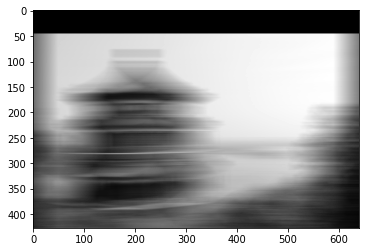

In [ ]:
# 2 filtry
filters = np.zeros(shape=(100, 100, channels, 2), dtype = np.float32)
filters[:, 3, :, 0] = 1 # vertical line in middle
filters[3, :, :, 1] = 1 # hor


outputs = tf.nn.conv2d(images, filters, strides=1, padding="SAME")
import matplotlib.pyplot as plt

plt.imshow(outputs[0,:,:,1], cmap="gray") #first image (0), 2nd feature map (1 - horizontal)
plt.show()

In [ ]:
#let's not create filters manually like a dummy
from tensorflow import keras
conv = keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, padding="same", activation="relu") #kernel_size =3 -> 3*3 weights

#pooling
max_pool = keras.layers.MaxPool2D(pool_size=2)
#max pooling is useful to have some translation invariance (indifference to delicate changes in position)
#max pooling is destructive when done in semantic segmentation (we wan't delicate changes in position influence the output  )

"""
# depth max pool
#depth max pool wyciąga najmocniejsze featurey z kilku map (w głąb zamiast wszerz i wzdłuż)
output = tf.nn.max_pool(images,
                        ksize=(1,1,1,3), # batch height width depth
                        strides=(1,1,1,3),
                        padding="VALID")
# in a model we use something like this

depth_pool = keras.layers.Lambda(
  lambda X: tf.nn.max_pool(X, ksize=(1,1,1,3), strides =(1,1,1,3), padding="VALID")
)
"""

'\n# depth max pool\n#depth max pool wyciąga najmocniejsze featurey z kilku map (w głąb zamiast wszerz i wzdłuż)\noutput = tf.nn.max_pool(images,\n                        ksize=(1,1,1,3), # batch height width depth\n                        strides=(1,1,1,3),\n                        padding="VALID")\n# in a model we use something like this\n\ndepth_pool = keras.layers.Lambda(\n  lambda X: tf.nn.max_pool(X, ksize=(1,1,1,3), strides =(1,1,1,3), padding="VALID")\n)\n'

In [ ]:
#global average pool
#yeets the whole feature map into a single number
#whole convolutional layer becomes a vector with values as many as feature maps

global_vg_pool = keras.layers.GlobalAvgPool2D()
global_avg_pool = keras.layers.Lambda(lambda X:tf.reduce_mean(X, axis=[1,2])) 
#equivalent, axis are the spatial ones - 1,2 is height and width

In [ ]:
#first kernel is widepeepoHappy
#further kernel can be smol
keras.backend.clear_session()
input_shape = (28,28,1)
model = keras.models.Sequential([
                                 keras.layers.Input(shape=input_shape),
                                 keras.layers.Conv2D(64, 7,  activation="relu", padding="same", name="a"), 
                                 #64 filtrów się wyuczy rozmiaru 7*7, trzecia liczba to byłby stride
                                 keras.layers.MaxPooling2D(2, name="b"), # 28*28 --> 14*14
                                 keras.layers.Conv2D(128,3, activation="relu", padding="same", name="c"),
                                 #128 filtrów 3x3
                                 keras.layers.Conv2D(128,3, activation="relu", padding="same"),
                                 keras.layers.MaxPooling2D(2), # 14*14 --> 7*7
                                
                                 keras.layers.Conv2D(256,3, activation="relu", padding="same"), #double filters with each pool
                                 keras.layers.Conv2D(256,3, activation="relu", padding="same"),
                                 keras.layers.MaxPooling2D(2),
                                 keras.layers.Flatten(),
                                 keras.layers.Dense(128, activation="relu"),
                                 keras.layers.Dropout(0.5),
                                 keras.layers.Dense(64, activation="relu"),
                                 keras.layers.Dropout(0.5),
                                 keras.layers.Dense(10, activation="softmax")

])

In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train, X_test = X_train / 255, X_test / 255
print(X_test.shape)
X_train = X_train.reshape(X_train.shape[0], 28,28,1)
X_test = X_test.reshape(X_test.shape[0], 28,28,1)


(10000, 28, 28)


In [ ]:
model.compile(metrics=["accuracy"], optimizer="nadam", loss="sparse_categorical_crossentropy")
model.fit(X_train, y_train, epochs=25, validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 12s 8ms/step - loss: 0.7189 - accuracy: 0.7436 - val_loss: 0.3843 - val_accuracy: 0.8549
Epoch 2/25
1500/1500 [==============================] - 11s 8ms/step - loss: 0.4074 - accuracy: 0.8607 - val_loss: 0.3023 - val_accuracy: 0.8882
Epoch 3/25
1500/1500 [==============================] - 12s 8ms/step - loss: 0.3453 - accuracy: 0.8840 - val_loss: 0.2946 - val_accuracy: 0.8909
Epoch 4/25
1500/1500 [==============================] - 12s 8ms/step - loss: 0.3099 - accuracy: 0.8952 - val_loss: 0.2714 - val_accuracy: 0.9003
Epoch 5/25
1500/1500 [==============================] - 11s 8ms/step - loss: 0.2836 - accuracy: 0.9007 - val_loss: 0.2696 - val_accuracy: 0.9078
Epoch 6/25
1500/1500 [==============================] - 12s 8ms/step - loss: 0.2686 - accuracy: 0.9082 - val_loss: 0.2542 - val_accuracy: 0.9075
Epoch 7/25
1500/1500 [==============================] - 12s 8ms/step - loss: 0.2504 - accuracy: 0.9124 - val_loss: 0.2759 - val_ac

In [ ]:
len(x_train[0])

NameError: ignored

In [ ]:
class ResidualUnit(keras.layers.Layer):
  def __init__(self, filters, strides=1, activation="relu", **kwargs):
    super().__init__(**kwargs)
    self.activation = keras.activations.get(activation)
    self.main_layers = [
                        
                        keras.layers.Conv2D(filters, 3, strides = strides, padding="same", use_bias=False), #3x3
                        keras.layers.BatchNormalization(),
                        self.activation,
                        keras.layers.Conv2D(filters, 3, strides=1, padding="same", use_bias=False),
                        keras.layers.BatchNormalization()
    ]
    self.skip_layers = []
    if strides > 1:
      self.skip_layers = [
                          keras.layers.Conv2D(filters, 1, strides=strides, padding="same", use_bias=False),
                          keras.layers.BatchNormalization()
      ]
  def call(self, inputs):
    Z = inputs
    for layer in self.main_layers:
      Z = layer(Z)
    skip_Z = inputs
    for layer in self.skip_layers:
      skip_Z = layer(skip_Z)
    return self.activation(Z+skip_Z)
#to jest residual unit
#co robi?
#dodaje gołe inputy do wyniku warstw konwolucyjnych
#na samym początku, gdy zainicjujemy wyniki wszystkiego są bliskie 0
#teraz zaczynamy od funkcji f(X) = X (0+ X)


In [ ]:
#ResNet34
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(64, 7, strides=2, input_shape=[28,28,1], padding="same", use_bias=False)) # 28 28 1 dla fashion mnist 224 224 3 dla chayna
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation("relu"))
model.add(keras.layers.MaxPool2D(pool_size=3, strides=2, padding="same")) # redukuje rozmiar do 1/4
prev_filters=64
for filters in [64] *3 + [128] *4 + [256] *6 + [512] *3:
  strides = 1 if filters == prev_filters else 2
  model.add(ResidualUnit(filters, strides=strides))
  prev_filters = filters
model.add(keras.layers.GlobalAvgPool2D())
model.add(keras.layers.Dense(10, activation="softmax"))

In [ ]:
p = [64] *3
print(p)

[64, 64, 64]


In [ ]:
model.compile(metrics=["accuracy"], loss="sparse_categorical_crossentropy", optimizer="nadam")
model.fit(X_train, y_train, epochs=20, validation_split=0.2)
#na fashion mnist bo jestem leniwym kutasem


Epoch 1/20
1500/1500 [==============================] - 60s 40ms/step - loss: 0.5312 - accuracy: 0.8194 - val_loss: 0.4004 - val_accuracy: 0.8537
Epoch 2/20
1500/1500 [==============================] - 59s 39ms/step - loss: 0.3561 - accuracy: 0.8733 - val_loss: 0.3352 - val_accuracy: 0.8777
Epoch 3/20
1500/1500 [==============================] - 58s 39ms/step - loss: 0.3153 - accuracy: 0.8872 - val_loss: 0.3979 - val_accuracy: 0.8592
Epoch 4/20
1500/1500 [==============================] - 58s 39ms/step - loss: 0.3133 - accuracy: 0.8876 - val_loss: 0.2945 - val_accuracy: 0.8949
Epoch 5/20
1500/1500 [==============================] - 58s 38ms/step - loss: 0.2658 - accuracy: 0.9029 - val_loss: 0.2775 - val_accuracy: 0.9016
Epoch 6/20
1500/1500 [==============================] - 58s 39ms/step - loss: 0.2448 - accuracy: 0.9102 - val_loss: 0.2663 - val_accuracy: 0.9039
Epoch 7/20
1500/1500 [==============================] - 58s 39ms/step - loss: 0.2425 - accuracy: 0.9135 - val_loss: 0.2694 -

102973440/102967424 [==============================] - 1s 0us/step


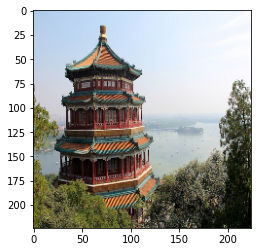

40960/35363 [==================================] - 0s 0us/step
Image #0


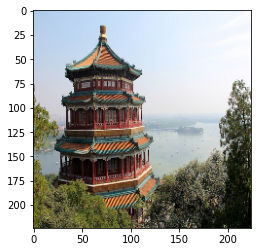

  n02825657 - bell_cote    82.35%
  n03877845 - palace       6.75%
  n03781244 - monastery    4.19%
  n02980441 - castle       3.16%
  n03028079 - church       1.00%
  n02843684 - birdhouse    0.66%
  n04435653 - tile_roof    0.38%
  n04346328 - stupa        0.37%
  n02859443 - boathouse    0.24%
  n09332890 - lakeside     0.23%

Image #1


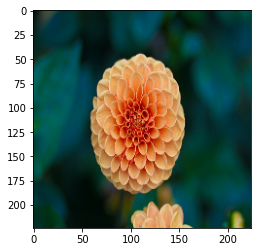

  n03530642 - honeycomb    49.83%
  n13040303 - stinkhorn    33.95%
  n02206856 - bee          4.35%
  n11939491 - daisy        3.23%
  n12985857 - coral_fungus 2.66%
  n04522168 - vase         2.00%
  n01950731 - sea_slug     0.63%
  n13052670 - hen-of-the-woods 0.33%
  n13133613 - ear          0.29%
  n13044778 - earthstar    0.21%



In [ ]:
#ResNet34
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(64, 7, strides=2, input_shape=[224,224,3], padding="same", use_bias=False)) # 28 28 1 dla fashion mnist 224 224 3 dla chayna
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation("relu"))
model.add(keras.layers.MaxPool2D(pool_size=3, strides=2, padding="same")) # redukuje rozmiar do 1/4
prev_filters=64
for filters in [64] *3 + [128] *4 + [256] *6 + [512] *3:
  strides = 1 if filters == prev_filters else 2
  model.add(ResidualUnit(filters, strides=strides))
  prev_filters = filters
model.add(keras.layers.GlobalAvgPool2D())
model.add(keras.layers.Dense(10, activation="softmax"))

model.compile(metrics=["accuracy"], loss="sparse_categorical_crossentropy", optimizer="nadam")
#na fashion mnist bo jestem leniwym kutasem
#model.fit(X_train_ilsvrc2015 .... ) # and your computer will also burn


#pretrained

import sklearn
import tensorflow as tf
import numpy as np
import pandas as pd

from sklearn.datasets import load_sample_image

china = load_sample_image("china.jpg") /255
flower = load_sample_image("flower.jpg") /255
images = np.array([china, flower])

model = keras.applications.resnet50.ResNet50(weights="imagenet")
images_resized = tf.image.resize(images, [224, 224])
plt.imshow(images_resized[0])
plt.show()


inputs = keras.applications.resnet50.preprocess_input(images_resized * 255) #rescale back to 0-255 from 0-1
Y_proba = model.predict(inputs)

top_kek = keras.applications.resnet50.decode_predictions(Y_proba, top=10)
for image_index in range(2):
  print("Image #{}".format(image_index))
  plt.imshow(images_resized[image_index])
  plt.show()
  for class_id, name, y_proba in top_kek[image_index]:
    print("  {} - {:12s} {:.2f}%".format(class_id, name, y_proba * 100))
  print() 

In [ ]:
images_resized.shape

TensorShape([2, 224, 224, 3])

In [ ]:
#pretraining
#make a 


import tensorflow_datasets as tfds
dataset0 = tfds.load("tf_flowers", as_supervised=False) #as_supervised = false includes labels, but doesn't split tensors into a tuple
dataset, info = tfds.load("tf_flowers", as_supervised=True, with_info=True) # with_info = true we get a secondary dataset with information about dataset

In [ ]:

for x in dataset0["train"].take(1):
  print(x)

In [ ]:
for x in dataset[0]["train"].take(1):
  print(x)

In [ ]:
class_names = info.features["label"].names # dandelion, daisy .. 5 flower types
dataset_size = info.splits["train"].num_examples
n_classes = info.features["label"].num_classes

# only train dataset is provided so split it now
test_set_raw, valid_set_raw, train_set_raw = tfds.load(
    "tf_flowers",
    split=["train[:10%]", "train[10%:25%]", "train[25%:]"],
    as_supervised=True)

(240, 240, 3)
(375, 500, 3)
(334, 500, 3)
(240, 207, 3)
(265, 500, 3)
(240, 320, 3)
(212, 320, 3)
(333, 500, 3)
(240, 320, 3)


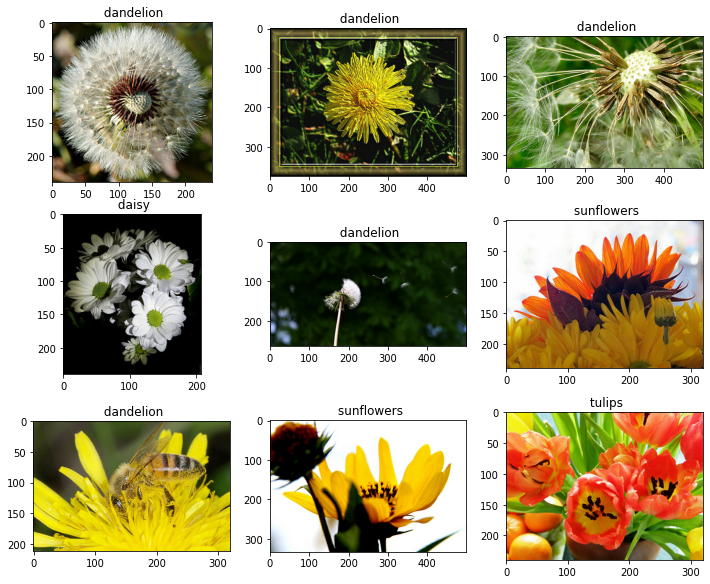

In [ ]:
#pretty pony picture
plt.figure(figsize=(12,10))
index = 0
for image, label in train_set_raw.take(9):
  print(image.shape)
  index +=1
  plt.subplot(3,3, index)
  plt.imshow(image)
  plt.title(" {}". format(class_names[label]))

plt.show()

In [ ]:
#basic preprocessing
def preprocess(image, label):
  resized_image = tf.image.resize(image, [224, 224])
  final_image = keras.applications.xception.preprocess_input(resized_image)
  return final_image

#this isn't your everyday preprocessing, Squidward
#this is ADVANCED preprocessing
x = partial(3)

NameError: ignored

In [ ]:
from functools import partial

test_set_raw, valid_set_raw, train_set_raw = tfds.load(
    "tf_flowers",
    split=["train[:10%]", "train[10%:25%]", "train[25%:]"],
    as_supervised=True)

def central_crop(image):
    shape = tf.shape(image) #zdjęcie powiedzmy 600*800 wysokość *szerość (normalnie się podaje rozdziałkę odwrotnie, wiem)
    min_dim = tf.reduce_min([shape[0], shape[1]]) # weź minimum 600
    top_crop = (shape[0] - min_dim) // 4 # zero w zwykłych prostokątnych zdjęciach 600-600/4
    bottom_crop = shape[0] - top_crop    # zero w zwykłych prostokątnych zdjęciach
    left_crop = (shape[1] - min_dim) // 4  # 800- 600 //4  -> 50
    right_crop = shape[1] - left_crop#800-50
    return image[top_crop:bottom_crop, left_crop:right_crop] # 0:800, 50:750

def random_crop(image):
    shape = tf.shape(image)
    min_dim = tf.reduce_min([shape[0], shape[1]]) * 90 // 100 # 90% * 600
    return tf.image.random_crop(image, [min_dim, min_dim, 3])  # wycina kawałek 540*540 wycinając w losowym odstępie od lewego-górnego rogu

def preprocess(image, label, randomize=False):
    if randomize:
        cropped_image = random_crop(image)
        cropped_image = tf.image.random_flip_left_right(cropped_image) #odwrócenie kartki na drugą stronę
    else:
        cropped_image = central_crop(image)
    resized_image = tf.image.resize(cropped_image, [224, 224])
    final_image = keras.applications.xception.preprocess_input(resized_image)# dalej sobie robi preprocessing wewnętrzny
    return final_image, label

batch_size = 32
train_set = train_set_raw.shuffle(1000).repeat(0)
train_set = train_set.map(partial(preprocess, randomize=True)).batch(batch_size).prefetch(1)  #bez partial nie zadziała, bo preprocess potrzebuje trzech argumentów, tak to by dostał tylko 1 i się interpreter wywala
# z partial mamy nową (nienazwaną) funkcję która potrzebuje tylko (image, label), czyli dokładnie to co daje test_set.take(1)
valid_set = valid_set_raw.map(preprocess).batch(batch_size).prefetch(1) 
test_set = test_set_raw.map(preprocess).batch(batch_size).prefetch(1)#map(preprocess) widzi, że train_set.take(1) to (image, label)

In [ ]:
  """
test_set = test_set.take(1)
for unit in test_set:
  print(unit)
  """
# (tuple: <tensor for image> , <image for label> )

In [ ]:
#szukamy czegoś z grubsza takiego
#train = train_set.map(preprocess(train_set, randomize=True)) #wypierdala nam argumnety bo potrzebne są labelki
z = partial(preprocess, randomize=True)

In [ ]:
from functools import partial

test_set_raw, valid_set_raw, train_set_raw = tfds.load(
    "tf_flowers",
    split=["train[:10%]", "train[10%:25%]", "train[25%:]"],
    as_supervised=True)

def central_crop(image):
    shape = tf.shape(image) #zdjęcie powiedzmy 600*800 wysokość *szerość (normalnie się podaje rozdziałkę odwrotnie, wiem)
    min_dim = tf.reduce_min([shape[0], shape[1]]) # weź minimum 600
    top_crop = (shape[0] - min_dim) // 4 # zero w zwykłych prostokątnych zdjęciach 600-600/4
    bottom_crop = shape[0] - top_crop    # zero w zwykłych prostokątnych zdjęciach
    left_crop = (shape[1] - min_dim) // 4  # 800- 600 //4  -> 50
    right_crop = shape[1] - left_crop#800-50
    return image[top_crop:bottom_crop, left_crop:right_crop] # 0:800, 50:750

def random_crop(image):
    shape = tf.shape(image)
    min_dim = tf.reduce_min([shape[0], shape[1]]) * 90 // 100 # 90% * 600
    return tf.image.random_crop(image, [min_dim, min_dim, 3])  # wycina kawałek 540*540 wycinając w losowym odstępie od lewego-górnego rogu

def preprocess(image, label, randomize=False):
    if randomize:
        cropped_image = random_crop(image)
        cropped_image = tf.image.random_flip_left_right(cropped_image) #odwrócenie kartki na drugą stronę
    else:
        cropped_image = central_crop(image)
    resized_image = tf.image.resize(cropped_image, [224, 224])
    final_image = keras.applications.xception.preprocess_input(resized_image)# dalej sobie robi preprocessing wewnętrzny
    return final_image, label

batch_size = 32
train_set = train_set_raw.shuffle(1000).repeat()
train_set = train_set.map(partial(preprocess, randomize=True)).batch(batch_size).prefetch(1)
 #bez partial nie zadziała, bo preprocess potrzebuje trzech argumentów, tak to by dostał tylko 1 i się interpreter wywala
# z partial mamy nową (nienazwaną) funkcję która potrzebuje tylko (image, label), czyli dokładnie to co daje test_set.take(1)
valid_set = valid_set_raw.map(preprocess).batch(batch_size).prefetch(1)
test_set = test_set_raw.map(preprocess).batch(batch_size).prefetch(1)

base_model = keras.applications.xception.Xception(weights="imagenet", include_top = False) #bez dense'a na górze
avg = keras.layers.GlobalAveragePooling2D()(base_model.output)
output = keras.layers.Dense(n_classes, activation="softmax")(avg) #robimy nasz dense na 5 klas zamiast 10000
model = keras.models.Model(inputs=base_model.input, outputs = output) # inputs to serie inputów które są tensorami
for layer in base_model.layers:
    layer.trainable = False#nie ruszamy delikatnych wag wielkiej sieci na dole

optimizer = keras.optimizers.SGD(lr=0.2, momentum=0.9, decay=0.01)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])
history = model.fit(train_set,
                    steps_per_epoch=int(0.75 * dataset_size / batch_size), #potrzebne bo train_set jest na repeat( ) czyli inf
                    validation_data=valid_set,
                    validation_steps=int(0.15 * dataset_size / batch_size),
                    epochs=5)

Epoch 1/5
86/86 [==============================] - 9s 110ms/step - loss: 1.2617 - accuracy: 0.7907 - val_loss: 0.8049 - val_accuracy: 0.8585
Epoch 2/5
86/86 [==============================] - 9s 99ms/step - loss: 0.4690 - accuracy: 0.9015 - val_loss: 0.6816 - val_accuracy: 0.8658
Epoch 3/5
86/86 [==============================] - 8s 97ms/step - loss: 0.3104 - accuracy: 0.9248 - val_loss: 0.7229 - val_accuracy: 0.8621
Epoch 4/5
86/86 [==============================] - 8s 99ms/step - loss: 0.2419 - accuracy: 0.9382 - val_loss: 0.8103 - val_accuracy: 0.8603
Epoch 5/5
86/86 [==============================] - 8s 98ms/step - loss: 0.1662 - accuracy: 0.9524 - val_loss: 0.5876 - val_accuracy: 0.8787


In [ ]:
from functools import partial
 
def multiply(x, y):
       return x * y
 
doubleNum = partial(multiply, 2) # robi funkcję typu callable o nazwie doublenum, która używa multiply  x *2 i akceptuje jeden argument
tripleNum = partial(multiply, 3)
 
print(doubleNum(10))
preprocess(image, label, randomize=False)

my_preprocess = partial(preprocess, randomize=True) # robi funkcję typu callable  o nazwie my_preprocess która używa preprocess 



20


In [ ]:
print(tf.reduce_min([100,200]))

tf.Tensor(100, shape=(), dtype=int32)


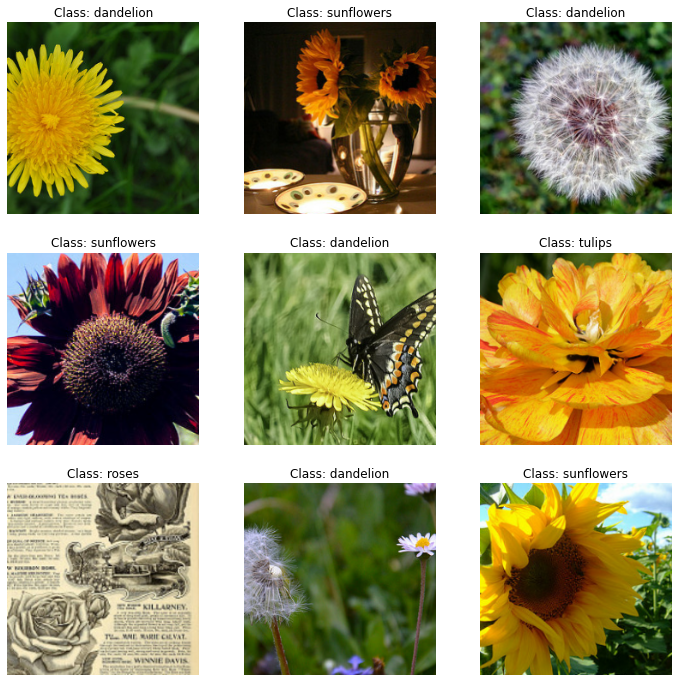

In [ ]:
plt.figure(figsize=(12, 12))
for X_batch, y_batch in train_set.take(1):
    for index in range(9):
        plt.subplot(3, 3, index + 1)
        plt.imshow(X_batch[index] / 2 + 0.5)
        plt.title("Class: {}".format(class_names[y_batch[index]]))
        plt.axis("off")

plt.show()

In [ ]:

for layer in base_model.layers:
    layer.trainable = True #rozkręcamy rdzeń modelu jak już się trochę poduczył

optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9,
                                 nesterov=True, decay=0.001) #i dokładnie dlatego, że rozkręcamy rdzeń modelu działamy delikatniej
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])
history = model.fit(train_set,
                    steps_per_epoch=int(0.75 * dataset_size / batch_size),
                    validation_data=valid_set,
                    validation_steps=int(0.15 * dataset_size / batch_size),
                    epochs=40)


Epoch 1/40
 2/86 [..............................] - ETA: 15s - loss: 0.4888 - accuracy: 0.8281WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0910s vs `on_train_batch_end` time: 0.2882s). Check your callbacks.


86/86 [==============================] - 35s 407ms/step - loss: 0.3067 - accuracy: 0.8993 - val_loss: 0.6315 - val_accuracy: 0.8529
Epoch 2/40
86/86 [==============================] - 34s 400ms/step - loss: 0.1240 - accuracy: 0.9604 - val_loss: 0.3342 - val_accuracy: 0.8971
Epoch 3/40
86/86 [==============================] - 35s 402ms/step - loss: 0.0591 - accuracy: 0.9822 - val_loss: 0.2526 - val_accuracy: 0.9246
Epoch 4/40
86/86 [==============================] - 35s 401ms/step - loss: 0.0325 - accuracy: 0.9887 - val_loss: 0.2730 - val_accuracy: 0.9246
Epoch 5/40
86/86 [==============================] - 35s 402ms/step - loss: 0.0372 - accuracy: 0.9866 - val_loss: 0.3039 - val_accuracy: 0.9099
Epoch 6/40
86/86 [==============================] - 35s 401ms/step - loss: 0.0328 - accuracy: 0.9909 - val_loss: 0.2710 - val_accuracy: 0.9154
Epoch 7/40
86/86 [==============================] - 35s 404ms/step - loss: 0.0268 - accuracy: 0.9906 - val_loss: 0.2773 - val_accuracy: 0.9265
Epoch 8/40

KeyboardInterrupt: ignored

In [ ]:
#klasyfikacja i lokalizacja

base_model = keras.applications.xception.Xception(weights="imagenet", include_top=False)
avg = keras.layers.GlobalAveragePooling2D()(base_model.output)
class_output = keras.layers.Dense(n_classes, activation="softmax")(avg)
loc_output = keras.layers.Dense(4)(avg)
model = keras.models.Model(inputs=base_model.input, outputs=[class_output, loc_output])
model.compile(loss=["sparse_categorical_crossentropy", "mse"], loss_weights=[0.8, 0.2], optimizer =optimizer, metrics=["accuracy"])
def add_random_bounding_boxes(images, labels):
    fake_bboxes = tf.random.uniform([tf.shape(images)[0], 4])
    return images, (labels, fake_bboxes)

fake_train_set = train_set.take(5).repeat(2).map(add_random_bounding_boxes) #dołóż do każdego datapunktu tensor z granicami
model.fit(fake_train_set, steps_per_epoch=5, epochs=2) # # (image, (label, box))

Epoch 1/2
2/5 [===========>..................] - ETA: 0s - loss: 1.3971 - dense_20_loss: 1.6347 - dense_21_loss: 0.4468 - dense_20_accuracy: 0.2656 - dense_21_accuracy: 0.3125WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0951s vs `on_train_batch_end` time: 0.2909s). Check your callbacks.


5/5 [==============================] - 2s 370ms/step - loss: 1.3927 - dense_20_loss: 1.6279 - dense_21_loss: 0.4518 - dense_20_accuracy: 0.2750 - dense_21_accuracy: 0.2750
Epoch 2/2
5/5 [==============================] - 2s 360ms/step - loss: 1.3092 - dense_20_loss: 1.5527 - dense_21_loss: 0.3353 - dense_20_accuracy: 0.3313 - dense_21_accuracy: 0.1562


In [ ]:
fake_bboxes = tf.random.uniform([tf.shape(images)[0], 4]) #2 zdjęcia * 4 granice
print(fake_bboxes)

tf.Tensor(
[[0.25700665 0.14067447 0.01589119 0.9203478 ]
 [0.9474999  0.10382462 0.19390678 0.4585626 ]], shape=(2, 4), dtype=float32)


In [ ]:
tf.shape(images)[0]

<tf.Tensor: shape=(), dtype=int32, numpy=2>

In [ ]:
for yo_mamma in fake_train_set:
  print(yo_mamma)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(2, 224, 224, 3)


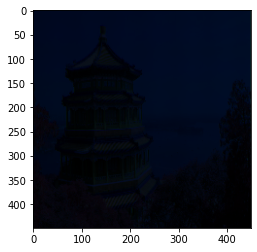

In [ ]:

X = images_resized.numpy()
print(X.shape)
conv_transpose = keras.layers.Conv2DTranspose(filters=5, kernel_size=3, strides=2, padding="VALID") # strides = 2 -> ~upscale *2
output = conv_transpose(X)
output.shape
#plt.imshow(X[0]) #~200*200
plt.imshow(output[0, :, :, :3]) # ~400*400 + fucked up colors for whatever reason

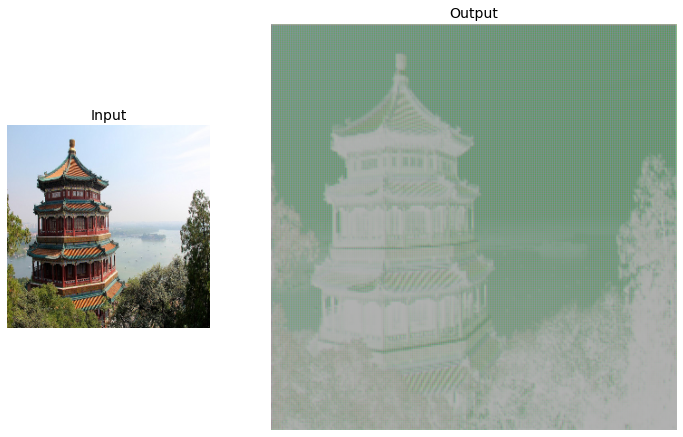

In [ ]:
def normalize(X):
    return (X - tf.reduce_min(X)) / (tf.reduce_max(X) - tf.reduce_min(X))
import matplotlib as mpl
fig = plt.figure(figsize=(12, 8))
gs = mpl.gridspec.GridSpec(nrows=1, ncols=2, width_ratios=[1, 2])

ax1 = fig.add_subplot(gs[0, 0])
ax1.set_title("Input", fontsize=14)
ax1.imshow(X[0])  # plot the 1st image
ax1.axis("off")
ax2 = fig.add_subplot(gs[0, 1])
ax2.set_title("Output", fontsize=14)
ax2.imshow(normalize(output[0, ..., :3]), interpolation="bicubic")  # plot the output for the 1st image
ax2.axis("off")
plt.show()

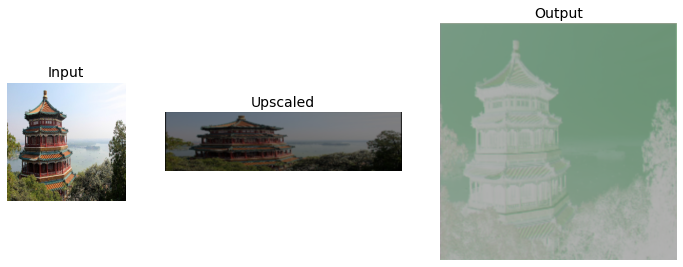

In [ ]:
def upscale_images(images, stride, kernel_size):
    batch_size, height, width, channels = images.shape
    upscaled = np.zeros((batch_size,
                         (height - 1) * stride + 2 * kernel_size - 1,
                         (width - 1) * stride + 2 * kernel_size - 1,
                         channels))
    upscaled[:,
             kernel_size - 1:(height - 1) * stride + kernel_size:stride, #start:stop:step # kernel 3 stride 2
             kernel_size - 1:(width - 1) * stride + kernel_size:stride, #od drugiego piksela do samego końca powiększonego wymiaru
             # uwaga: co drugi piksel na tym etapie to 0,0,0
             :] = images
    return upscaled


upscaled = upscale_images(X, stride=2, kernel_size=3)
weights, biases = conv_transpose.weights
reversed_filters = np.flip(weights.numpy(), axis=[0, 1])
reversed_filters = np.transpose(reversed_filters, [0, 1, 3, 2])
manual_output = tf.nn.conv2d(upscaled, reversed_filters, strides=1, padding="VALID")
def normalize(X):
    return (X - tf.reduce_min(X)) / (tf.reduce_max(X) - tf.reduce_min(X))

fig = plt.figure(figsize=(12, 8))
gs = mpl.gridspec.GridSpec(nrows=1, ncols=3, width_ratios=[1, 2, 2])

ax1 = fig.add_subplot(gs[0, 0])
ax1.set_title("Input", fontsize=14)
ax1.imshow(X[0])  # plot the 1st image
ax1.axis("off")
ax2 = fig.add_subplot(gs[0, 1])
ax2.set_title("Upscaled", fontsize=14)
ax2.imshow(upscaled[0][0::2][0::2], interpolation="bicubic") #compare[0::2][0::2] with [1::2][1::2] - ten drugi jest cały czarny
ax2.axis("off")
ax3 = fig.add_subplot(gs[0, 2])
ax3.set_title("Output", fontsize=14)
ax3.imshow(normalize(manual_output[0, ..., :3]), interpolation="bicubic")  # plot the output for the 1st image
ax3.axis("off")
plt.show()

In [ ]:
upscaled[0][50][53]

array([0., 0., 0.])

In [ ]:
a = np.arange(100)
b = np.zeros(200)
b[::2] = a
print(b)

[ 0.  0.  1.  0.  2.  0.  3.  0.  4.  0.  5.  0.  6.  0.  7.  0.  8.  0.
  9.  0. 10.  0. 11.  0. 12.  0. 13.  0. 14.  0. 15.  0. 16.  0. 17.  0.
 18.  0. 19.  0. 20.  0. 21.  0. 22.  0. 23.  0. 24.  0. 25.  0. 26.  0.
 27.  0. 28.  0. 29.  0. 30.  0. 31.  0. 32.  0. 33.  0. 34.  0. 35.  0.
 36.  0. 37.  0. 38.  0. 39.  0. 40.  0. 41.  0. 42.  0. 43.  0. 44.  0.
 45.  0. 46.  0. 47.  0. 48.  0. 49.  0. 50.  0. 51.  0. 52.  0. 53.  0.
 54.  0. 55.  0. 56.  0. 57.  0. 58.  0. 59.  0. 60.  0. 61.  0. 62.  0.
 63.  0. 64.  0. 65.  0. 66.  0. 67.  0. 68.  0. 69.  0. 70.  0. 71.  0.
 72.  0. 73.  0. 74.  0. 75.  0. 76.  0. 77.  0. 78.  0. 79.  0. 80.  0.
 81.  0. 82.  0. 83.  0. 84.  0. 85.  0. 86.  0. 87.  0. 88.  0. 89.  0.
 90.  0. 91.  0. 92.  0. 93.  0. 94.  0. 95.  0. 96.  0. 97.  0. 98.  0.
 99.  0.]
